# PyNEST - First Steps

**Modeling networks of spiking neurons using NEST**

**EITN Fall School 2022, 24.09.2022**

**[Barna Zajzon](mailto:b.zajzon@fz-juelich.de)**

This notebook guides through your first steps using NEST. It shows
* how to get help
* how to create and simulate a single neuron
* how to visualize the output

Essentially, this is a reproduction of the 'Hello World!' notebook with added explanations. 

For more details see [part 1 of the official PyNEST tutorial](https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html).

In [1]:
import nest # import NEST module
from matplotlib import pyplot as plt
import numpy as np


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@5e8790c31
 Built: Sep 14 2022 17:54:12

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## Getting help

In [2]:
# information about functions with Python's help() ...
help(nest.Models)

Help on function Models in module nest.lib.hl_api_models:

Models(mtype='all', sel=None)
    Return a tuple of model names, sorted by name.
    
    All available models are neurons, devices and synapses.
    
    Parameters
    ----------
    mtype : str, optional
        Use ``'mtype='nodes'`` to only see neuron and device models,
        or ``'type='synapses'`` to only see synapse models.
    sel : str, optional
        String used to filter the result list and only return models
        containing it.
    
    Returns
    -------
    tuple
        Available model names
    
    Raises
    ------
    ValueError
        Description
    
    Notes
    -----
    - Synapse model names ending with ``'_hpc'`` provide minimal memory
      requirements by using thread-local target neuron IDs and fixing
      the ``'rport'`` to 0.
    - Synapse model names ending with ``'_lbl'`` allow to assign an individual
      integer label (``'synapse_label'``) to created synapses at the cost
      of i

In [3]:
# ... or IPython's question mark
nest.Models()

('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_hpc',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_hpc',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'glif_cond',
 'glif_psc',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'ht_synapse',
 'ht_synap

## Creating a neuron

In [4]:
# before creating a new network,
# reset the simulation kernel / remove all nodes
nest.ResetKernel()

In [5]:
# create the neuron
neuron = nest.Create('iaf_psc_exp')

In [6]:
# investigate the neuron

# Create() just returns a list node collection yielding the size and the first GID.
# One can add node collections to create larger populations
neuron

NodeCollection(metadata=None, model=iaf_psc_exp, size=1, first=1)

In [7]:
# current dynamical state/parameters of the neuron
# note that the membrane voltage is at -70 mV
nest.GetStatus(neuron)

({'archiver_length': 0,
  'beta_Ca': 0.001,
  'C_m': 250.0,
  'Ca': 0.0,
  'delta': 0.0,
  'E_L': -70.0,
  'element_type': 'neuron',
  'frozen': False,
  'global_id': 1,
  'I_e': 0.0,
  'local': True,
  'model': 'iaf_psc_exp',
  'node_uses_wfr': False,
  'post_trace': 0.0,
  'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
  'rho': 0.01,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'V_m': -70.0,
  'V_reset': -70.0,
  'V_th': -55.0,
  'vp': 0},)

## Creating a spikegenerator

In [8]:
# create a spike generator
spikegenerator = nest.Create('spike_generator')

In [9]:
# check out 'spike_times' in its parameters
nest.GetStatus(spikegenerator)

({'allow_offgrid_times': False,
  'element_type': 'stimulator',
  'frozen': False,
  'global_id': 2,
  'label': '',
  'local': True,
  'model': 'spike_generator',
  'node_uses_wfr': False,
  'origin': 0.0,
  'precise_times': False,
  'shift_now_spikes': False,
  'spike_multiplicities': array([], dtype=int64),
  'spike_times': array([], dtype=float64),
  'spike_weights': array([], dtype=float64),
  'start': 0.0,
  'stimulus_source': '0',
  'stop': 1.7976931348623157e+308,
  'thread': 0,
  'thread_local_id': -1,
  'vp': 0},)

In [10]:
# set the spike times at 10 and 50 ms
nest.SetStatus(spikegenerator, {'spike_times': [10., 50., 55., 63., 65., 68., 100., 110., 115., 120., 122., 125.]})

## Creating a voltmeter

In [11]:
# create a voltmeter for recording
voltmeter = nest.Create('voltmeter')


In [12]:
# investigate the voltmeter (check out the GID)
voltmeter

NodeCollection(metadata=None, model=voltmeter, size=1, first=3)

In [ ]:
# see that it records membrane voltage, senders, times
nest.GetStatus(voltmeter)

## Creating a spike detector

In [13]:
# create a spike detector for recording
spikerecorder = nest.Create('spike_recorder')

In [14]:
# investigate the voltmeter
spikerecorder

NodeCollection(metadata=None, model=spike_recorder, size=1, first=4)

In [15]:
# see that it records membrane voltage, senders, times
nest.GetStatus(spikerecorder)

({'element_type': 'recorder',
  'events': {'senders': array([], dtype=int64),
   'times': array([], dtype=float64)},
  'frozen': False,
  'global_id': 4,
  'label': '',
  'local': True,
  'model': 'spike_recorder',
  'n_events': 0,
  'node_uses_wfr': False,
  'origin': 0.0,
  'record_to': 'memory',
  'start': 0.0,
  'stop': 1.7976931348623157e+308,
  'thread': 0,
  'thread_local_id': -1,
  'time_in_steps': False,
  'vp': 0},)

## Connecting

In [16]:
# investigate Connect() function
nest.Connect?

Signature:
nest.Connect(
    pre,
    post,
    conn_spec=None,
    syn_spec=None,
    return_synapsecollection=False,
)
Docstring:
Connect `pre` nodes to `post` nodes.

Nodes in `pre` and `post` are connected using the specified connectivity
(`all-to-all` by default) and synapse type (:cpp:class:`static_synapse <nest::static_synapse>` by default).
Details depend on the connectivity rule.

Parameters
----------
pre : NodeCollection (or array-like object)
    Presynaptic nodes, as object representing the IDs of the nodes
post : NodeCollection (or array-like object)
    Postsynaptic nodes, as object representing the IDs of the nodes
conn_spec : str or dict, optional
    Specifies connectivity rule, see below
syn_spec : str or dict, optional
    Specifies synapse model, see below
return_synapsecollection: bool
    Specifies whether or not we should return a :py:class:`.SynapseCollection` of pre and post connections

Raises
------
kernel.NESTError

Notes
-----
It is possible to connect Num

In [17]:
# connect spike generator and voltmeter to the neuron
nest.Connect(spikegenerator, neuron, syn_spec={'weight': 1e3})

In [18]:
nest.Connect(voltmeter, neuron)
nest.Connect(neuron, spikerecorder) # not the change of order

## Simulating

In [19]:
# run simulation for 100 ms
nest.Simulate(200.)


Sep 16 14:02:33 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 16 14:02:33 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 16 14:02:33 SimulationManager::run [Info]: 
    Simulation finished.


In [20]:
# look at nest's KernelStatus:
# network_size (root node, neuron, spike generator, voltmeter)
# num_connections
# time (simulation duration)
nest.GetKernelStatus()

{'adaptive_spike_buffers': True,
 'adaptive_target_buffers': True,
 'biological_time': 200.0,
 'buffer_size_spike_data': 2,
 'buffer_size_target_data': 2,
 'data_path': '',
 'data_prefix': '',
 'dict_miss_is_error': True,
 'growth_factor_buffer_spike_data': 1.5,
 'growth_factor_buffer_target_data': 1.5,
 'keep_source_table': True,
 'local_num_threads': 1,
 'local_spike_counter': 2,
 'max_buffer_size_spike_data': 8388608,
 'max_buffer_size_target_data': 16777216,
 'max_delay': 1.0,
 'max_num_syn_models': 512,
 'max_update_time': 4.9999999999999996e-06,
 'min_delay': 1.0,
 'min_update_time': 9.9999999999997e-07,
 'ms_per_tic': 0.001,
 'network_size': 4,
 'num_connections': 3,
 'num_processes': 1,
 'off_grid_spiking': False,
 'overwrite_files': False,
 'print_time': False,
 'recording_backends': {'memory': {}, 'ascii': {}, 'screen': {}},
 'recv_buffer_size_secondary_events': 0,
 'resolution': 0.1,
 'rng_seed': 143202461,
 'rng_type': 'mt19937_64',
 'rng_types': ('Philox_32',
  'Philox_64'

In [21]:
# note that voltmeter has recorded 99 events
nest.GetStatus(voltmeter)

({'element_type': 'recorder',
  'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1]),
   'times': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
           12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
           23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
           34

In [22]:
# read out recording time and voltage from voltmeter
times = nest.GetStatus(voltmeter)[0]['events']['times']
voltages = nest.GetStatus(voltmeter)[0]['events']['V_m']

In [23]:
# now have a look at the spikedetector
nest.GetStatus(spikerecorder)

({'element_type': 'recorder',
  'events': {'senders': array([1, 1]), 'times': array([ 69.1, 123.5])},
  'frozen': False,
  'global_id': 4,
  'label': '',
  'local': True,
  'model': 'spike_recorder',
  'n_events': 2,
  'node_uses_wfr': False,
  'origin': 0.0,
  'record_to': 'memory',
  'start': 0.0,
  'stop': 1.7976931348623157e+308,
  'thread': 0,
  'thread_local_id': 3,
  'time_in_steps': False,
  'vp': 0},)

In [24]:
spike_times = nest.GetStatus(spikerecorder)[0]['events']['times']

## Plotting

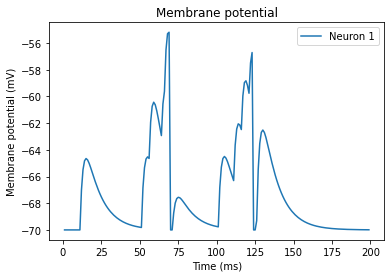

In [25]:
# plot results
# units can be found in documentation
plt.plot(times, voltages, label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential')
plt.legend()

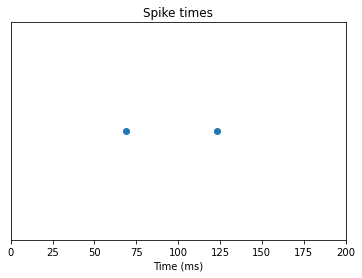

In [26]:
plt.plot(spike_times, np.zeros(len(spike_times)), marker = 'o', linestyle = ' ' )
plt.xlabel('Time (ms)')
plt.xlim(0,200)
plt.yticks([])
plt.title('Spike times')
plt.show()

In [27]:
# create the same plot with NEST's build-in plotting function
import nest.voltage_trace

[[<matplotlib.lines.Line2D at 0x7f651ac16550>]]

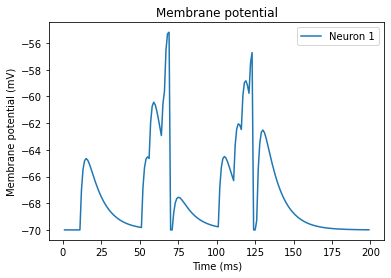

In [28]:
nest.voltage_trace.from_device(voltmeter) 

## Full network example


Sep 20 21:42:06 NodeManager::prepare_nodes [Info]: 
    Preparing 4001 nodes for simulation.

Sep 20 21:42:06 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4001
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Sep 20 21:42:07 SimulationManager::run [Info]: 
    Simulation finished.


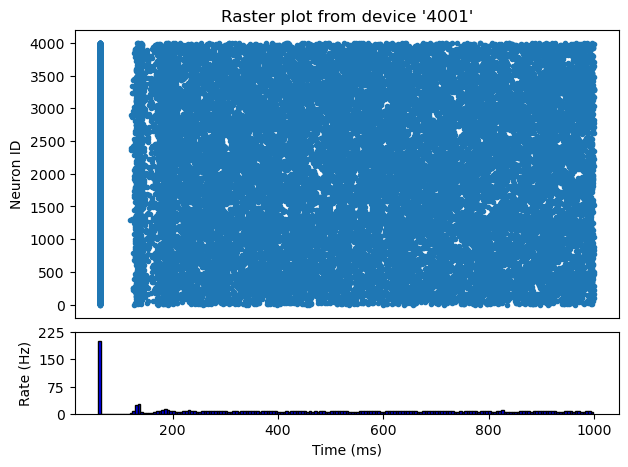

In [11]:
import nest.raster_plot
%matplotlib inline
from matplotlib import pyplot as plt

neuron_params = {'tau_m': 20.,
                 'tau_syn_ex': 5.,
                 'tau_syn_in': 20.,
                 'E_L': -49.,
                 'V_th': -50.,
                 'V_reset': -60.}
num_neurons = 4000
num_neurons_ex = 3200
num_neurons_in = num_neurons - num_neurons_ex

weights_ex = 6 * 0.27
weights_in = -2 * 4.5

conn_prob = 0.02

nest.ResetKernel()

neurons = nest.Create('iaf_psc_exp', num_neurons, params=neuron_params)

spike_recorder = nest.Create('spike_recorder',
                             params={'start': 0.,
                                     'stop': 1000.})

neurons_ex = neurons[:num_neurons_ex]
neurons_in = neurons[num_neurons_ex:]

nest.Connect(neurons_ex, neurons,
             conn_spec={'rule': 'pairwise_bernoulli', 'p': conn_prob},
             syn_spec={'weight': weights_ex, 'delay': 1.5})
nest.Connect(neurons_in, neurons,
             conn_spec={'rule': 'pairwise_bernoulli', 'p': conn_prob},
             syn_spec={'weight': weights_in, 'delay': 1.5})

nest.Connect(neurons, spike_recorder)

nest.Simulate(1000.)

nest.raster_plot.from_device(spike_recorder, hist=True)
plt.show()

## Now it's your turn!

* Check out the [official PyNEST tutorials](https://nest-simulator.readthedocs.io/en/latest/tutorials/index.html), in particular
  * part 1: Neurons and simple neural networks
  * part 2: Populations of neurons
* Create a small network of all-to-all connect neurons and couple them with strong synapses and different delays (see [here](https://nest-simulator.readthedocs.io/en/latest/guides/random_numbers.html?highlight=random%20number%20generators#randomize_connection_parameters), in particular Randomize connection parameters), drive the network to spiking with neuron parameter `I_e`. What happens if you use excitatory, what happens if you use inhibitory synapses (if they are sufficiently strong)